In [ ]:
#!pip install -U pandasql
#!pip install statsmodels

In [ ]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandasql import sqldf

import plotly.express as px

In [ ]:
# Bring in the pickled files
# if any of the pickle files cannot be reached, please update the directories
# to the download loaction of the zip then navigate to data/Races_Combined

allraces21 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/allraces_21.pkl")
allraces22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/allraces_22.pkl")

sameraces21 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_21.pkl")
sameraces22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_22.pkl")
sameraces21_22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_21_22.pkl")
allraces21_22 = pd.concat([allraces21, allraces22], ignore_index=True)



NameError: name 'pd' is not defined

In [ ]:
#allraces21_22.columns

This notebook is used to look at the Green Passes - comparing 2021 to 2022...

In [ ]:
# Starting with just plain passing year over year
passdiff_yoy = allraces21_22.groupby(['Season'])[['Pass Differential']].mean().reset_index()
grnpass_yoy = allraces21_22.groupby(['Season'])[['Green Passes']].mean().reset_index()
#grnpassed_yoy = allraces21_22.groupby(['Season'])[['Green Passed']].mean().reset_index()
qltypass_yoy = allraces21_22.groupby(['Season'])[['Quality Passes']].mean().reset_index()
pctqltypass_yoy = allraces21_22.groupby(['Season'])[['% Quality Passes']].mean().reset_index()

In [ ]:
#all_passing_df = pd.merge(passing_yoy, passdiff_yoy, on="Season")

In [ ]:
from functools import reduce
data_frames = [passdiff_yoy, grnpass_yoy, qltypass_yoy, pctqltypass_yoy]
all_passing_df = reduce(lambda  left,right: pd.merge(left,right,on=['Season'], how='outer'), data_frames)

In [ ]:
all_passing_df

,Season,Pass Differential,Green Passes,Quality Passes,% Quality Passes
0,2021,-0.027468,78.609503,30.020787,32.429220
1,2022,0.103226,92.344086,41.535484,38.341548


The amount of difference between Green Passes in 2021 vs 2022 looks like it could be significant. Next lets do a ttest on this and maybe a correlation to find out what those tell us...

In [ ]:
import scipy.stats as stats

gpdata_21 = allraces21['Green Passes'].to_list()
gpdata_22 = allraces22['Green Passes'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=gpdata_21, b=gpdata_22, equal_var=True)

Ttest_indResult(statistic=-3.8144921115805235, pvalue=0.000141041972265661)

This shows that these two samples are statistically significant. We'll make a plot of this as a possibility for our slides...

In [ ]:
# Curious about pass differential - lets do the same thing.
gpdata_21 = allraces21['Pass Differential'].to_list()
gpdata_22 = allraces22['Pass Differential'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=gpdata_21, b=gpdata_22, equal_var=True)

Ttest_indResult(statistic=-0.14310929367842248, pvalue=0.8862197944855443)

Pass differential is not much different. The amount of passing is but the difference between drivers is not.

Same thing except for just the races that are the same between 2021 and 2022...

In [ ]:
# Starting with just plain passing year over year
passdiff_yoy = sameraces21_22.groupby(['Season'])[['Pass Differential']].mean().reset_index()
grnpass_yoy = sameraces21_22.groupby(['Season'])[['Green Passes']].mean().reset_index()
#grnpassed_yoy = sameraces21_22.groupby(['Season'])[['Green Passed']].mean().reset_index()
qltypass_yoy = sameraces21_22.groupby(['Season'])[['Quality Passes']].mean().reset_index()
pctqltypass_yoy = sameraces21_22.groupby(['Season'])[['% Quality Passes']].mean().reset_index()
data_frames = [passdiff_yoy, grnpass_yoy, qltypass_yoy, pctqltypass_yoy]
sr_all_passing_df = reduce(lambda  left,right: pd.merge(left,right,on=['Season'], how='outer'), data_frames)
sr_all_passing_df

,Season,Pass Differential,Green Passes,Quality Passes,% Quality Passes
0,2021,0.104623,81.306569,34.856448,36.010584
1,2022,0.000000,96.451531,44.770408,39.098316


Lets do the same ttest on just the races that are the same...

In [ ]:
gpdata_21 = sameraces21['Green Passes'].to_list()
gpdata_22 = sameraces22['Green Passes'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=gpdata_21, b=gpdata_22, equal_var=True)

Ttest_indResult(statistic=-2.875646819352095, pvalue=0.004138963944956142)

The pvalue changed very slightly. Still significant. 

In [ ]:
gpdata_21 = sameraces21['Pass Differential'].to_list()
gpdata_22 = sameraces22['Pass Differential'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=gpdata_21, b=gpdata_22, equal_var=True)

Ttest_indResult(statistic=0.09792517289645716, pvalue=0.9220162092734245)

Same outcome as all races. Pass differential is very close to the same.

In [ ]:
#Going to start a plot here...
plt.style.use('_mpl-gallery')



In [ ]:
grnpass_std = sameraces21_22.groupby(['Season'])[['Green Passes']].std().reset_index()
grnpass_std.rename(columns={"Green Passes": "Green Passes Std Dev"}, inplace = True)
grnpass_avg = sameraces21_22.groupby(['Season'])[['Green Passes']].mean().reset_index()
grnpass_avg.rename(columns={"Green Passes": "Green Passes Mean"}, inplace = True)
grnpass_df = pd.merge(grnpass_std, grnpass_avg, on="Season")


In [ ]:
grnpass_df

,Season,Green Passes Std Dev,Green Passes Mean
0,2021,76.042019,81.306569
1,2022,73.057331,96.451531


In [ ]:
# Changing 'Same Races - Race #' out for 'Track'
grnpass_list21 = sameraces21.groupby(['Track'])['Green Passes'].sum().tolist()
grnpass_list22 = sameraces22.groupby(['Track'])['Green Passes'].sum().tolist()
# racenum_list21 = sameraces21.groupby(['Same Races - Race #'])['Same Races - Race #'].unique().tolist()
# racenum_list22 = sameraces22.groupby(['Same Races - Race #'])['Same Races - Race #'].unique().tolist()
# racenum_list21 = sameraces21['Same Races - Race #'].unique().tolist()
# racenum_list22 = sameraces22['Same Races - Race #'].unique().tolist()

racenum_list = np.arange(1,12,1)

In [ ]:
track_list21 = sameraces21.groupby(['Track'])['Track'].min()
track_list21 = track_list21.to_list()

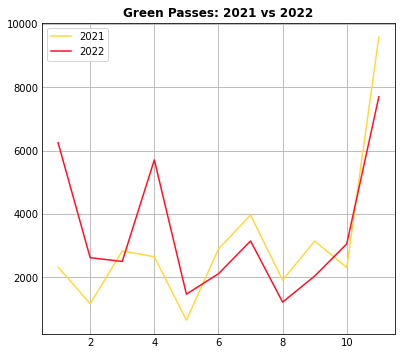

In [ ]:
#import plotly.graph_objects as go
fig, axes = plt.subplots(1, figsize=(5,5))

plt.sca(axes)
plt.plot(racenum_list,grnpass_list21,'#FFD93D')
plt.plot(racenum_list,grnpass_list22,'#FF0F27')
plt.legend(['2021','2022'], loc='upper left')
# plt.grid() not sure I love this with a grid line or not
plt.title('Green Passes: 2021 vs 2022',fontweight="bold")
#fig.update_layout(title={'text': "Green Passes: 2021 vs 2022"})

# plt.show()
plt.savefig('green_pass_21_22.png') # saving the chart

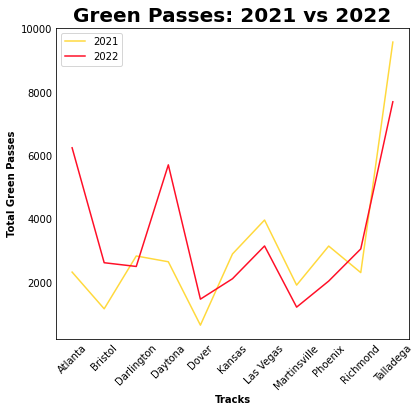

In [ ]:
#import plotly.graph_objects as go
from matplotlib import rc,rcParams
fig, axes = plt.subplots(1, figsize=(5,5))

plt.sca(axes)
plt.plot(track_list21,grnpass_list21,'#FFD93D')
plt.plot(track_list21,grnpass_list22,'#FF0F27')
plt.legend(['2021','2022'], loc='upper left')
axes.set_ylabel('Total Green Passes', fontweight='bold')
axes.set_xlabel('Tracks', fontweight='bold')
plt.grid(False)
plt.xticks(rotation = 45)
# plt.grid() not sure I love this with a grid line or not
plt.title('Green Passes: 2021 vs 2022',fontweight="bold", fontsize=20)
#fig.update_layout(title={'text': "Green Passes: 2021 vs 2022"})

# plt.show()
plt.savefig('green_pass_21_22.png') # saving the chart

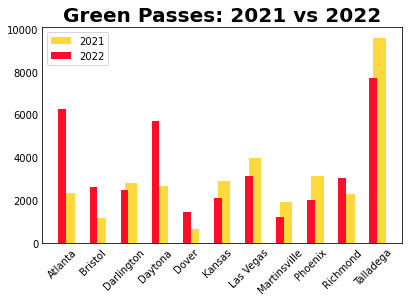

In [ ]:
#same information as above except as a bar
from matplotlib import rc,rcParams
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

ax.bar(track_list21,grnpass_list21,color='#FFD93D',width = 0.4, align = 'edge')
ax.bar(track_list21,grnpass_list22,color='#FF0F27',width = 0.25, align = 'center')
plt.legend(['2021','2022'], loc='upper left')
axes.set_ylabel('Total Green Passes', fontweight='bold')
axes.set_xlabel('Tracks', fontweight='bold')
plt.grid(False)
plt.xticks(rotation = 45)
# plt.grid() not sure I love this with a grid line or not
plt.title('Green Passes: 2021 vs 2022',fontweight="bold", fontsize=20)
#fig.update_layout(title={'text': "Green Passes: 2021 vs 2022"})

# plt.show()
plt.savefig('green_pass_21_22_bar.png', bbox_inches='tight') # saving the chart

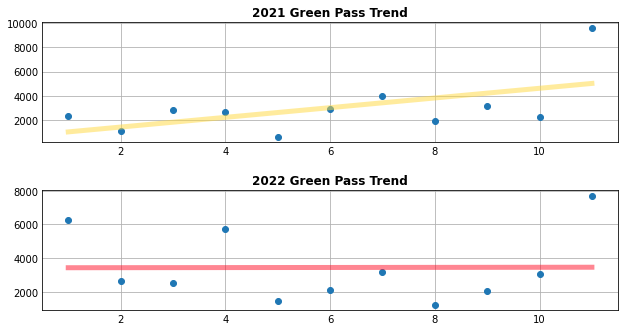

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5))

plt.sca(ax1)
plt.plot(racenum_list,grnpass_list21, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(racenum_list,grnpass_list21, 1)
#add linear regression line to scatterplot 
plt.plot(racenum_list, m*racenum_list+b,'#FFD93D',linewidth=5,alpha=0.5)
plt.title("2021 Green Pass Trend",fontweight="bold")

plt.sca(ax2)
plt.plot(racenum_list,grnpass_list22, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(racenum_list,grnpass_list22, 1)
#add linear regression line to scatterplot 
plt.plot(racenum_list, m*racenum_list+b,'#FF0F27',linewidth=5,alpha=0.5)
plt.title("2022 Green Pass Trend",fontweight="bold")

#adding some spacing to the subplots so the titles don't overlap
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4) 

# plt.show()
plt.savefig('green_pass_trends.png') # saving the chart

Going to re-do the regression lines using the race # instead of the tracks to see how passing progressed throughout the season instead of putting them in order of tracks...

In [ ]:
# Using 'Same Races - Race #' instead of 'Track' - this will put the races in order 
grnpass_list21 = sameraces21.groupby(['Same Races - Race #'])['Green Passes'].sum().tolist()
grnpass_list22 = sameraces22.groupby(['Same Races - Race #'])['Green Passes'].sum().tolist()
racenum_list = np.arange(1,12,1)

In [ ]:
grnpass_list21

[2648, 3966, 3144, 2322, 1163, 1911, 2306, 9585, 2831, 647, 2894]

In [ ]:
grnpass_list22

[5708, 3147, 2039, 6247, 3054, 1216, 2618, 7700, 1468, 2500, 2112]

It might be good to have the Track Names along the x-axis...

In [ ]:
track_list21 = sameraces21.groupby(['Same Races - Race #'])['Track'].min()
track_list22 = sameraces22.groupby(['Same Races - Race #'])['Track'].min()

In [ ]:
track_list21 = track_list21.to_list()
track_list22 = track_list22.to_list()

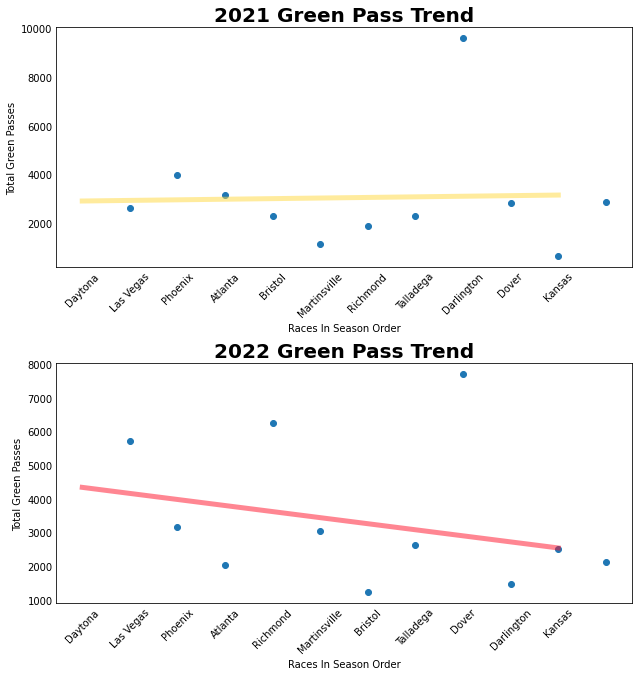

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

plt.sca(ax1)
plt.plot(racenum_list,grnpass_list21, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(racenum_list,grnpass_list21, 1)
#add linear regression line to scatterplot 
plt.plot(track_list21, m*racenum_list+b,'#FFD93D',linewidth=5,alpha=0.5)
ax1.set_ylabel('Total Green Passes')
ax1.set_xlabel('Races In Season Order')
plt.grid(False)
plt.xticks(rotation = 45)
plt.title("2021 Green Pass Trend",fontweight="bold", fontsize=20)

plt.sca(ax2)
plt.plot(racenum_list,grnpass_list22, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(racenum_list,grnpass_list22, 1)
#add linear regression line to scatterplot 
plt.plot(track_list22, m*racenum_list+b,'#FF0F27',linewidth=5,alpha=0.5)
ax2.set_ylabel('Total Green Passes')
ax2.set_xlabel('Races In Season Order')
plt.grid(False)
plt.xticks(rotation = 45)
plt.title("2022 Green Pass Trend",fontweight="bold", fontsize=20)

#adding some spacing to the subplots so the titles don't overlap
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4) 

# plt.show()
plt.savefig('green_pass_trends.png') # saving the chart

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ef4eb23-f38f-47e8-bfb0-51d8616b0dee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>